<a href="https://colab.research.google.com/github/sarit-adh/colab_notebooks/blob/main/CS501_HWII_Q4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import sys
import time
import matplotlib.pyplot as plt

In [ ]:
def merge_sort(arr):
  #print(arr)

  if len(arr)<=1:
    return arr
  
  arr_l = merge_sort(arr[:len(arr)//2])
  arr_r = merge_sort(arr[(len(arr)//2): ])

  l_ptr = 0
  r_ptr = 0
  merged = []
  while l_ptr< len(arr_l) and r_ptr < len (arr_r):
    if arr_l[l_ptr]< arr_r[r_ptr]:
      merged.append(arr_l[l_ptr])
      l_ptr+=1
    elif arr_l[l_ptr]> arr_r[r_ptr]:
      merged.append(arr_r[r_ptr])
      r_ptr+=1
    else:
      merged.append(arr_l[l_ptr])
      l_ptr+=1
      merged.append(arr_r[r_ptr])
      r_ptr+=1

  if l_ptr<len(arr_l):
    merged = np.append(merged, arr_l[l_ptr:])
    #merged+=arr_l[l_ptr:]

  if r_ptr<len(arr_r):
    merged = np.append(merged, arr_r[r_ptr:])
    #merged+=arr_r[r_ptr:]

  return merged


merge_sort(np.random.randint(1000,size=100))

array([  2,  41,  42,  49,  56,  71,  80,  87, 101, 102, 102, 105, 114,
       136, 149, 158, 175, 218, 218, 219, 235, 236, 241, 244, 246, 257,
       264, 284, 302, 330, 333, 339, 348, 351, 357, 362, 381, 399, 406,
       427, 427, 433, 435, 452, 458, 460, 461, 463, 469, 474, 475, 485,
       500, 520, 522, 524, 562, 562, 593, 601, 601, 616, 620, 633, 650,
       664, 664, 668, 694, 711, 720, 722, 740, 761, 765, 768, 768, 774,
       789, 796, 802, 815, 823, 850, 857, 866, 898, 899, 915, 920, 945,
       947, 948, 951, 951, 957, 972, 973, 975, 995])

In [ ]:
def partition(arr, pivot_ind):
  i = -1
  for j in range(len(arr)):
    if j==pivot_ind:
      i+=1
      continue
    if arr[j]<= arr[pivot_ind]:
      i+=1
      arr[i], arr[j] = arr[j], arr[i]
  arr[i], arr[pivot_ind] = arr[pivot_ind], arr[i]
  return i



def randomized_quick_sort(arr):
  #print(arr)
  if len(arr)<=1:
    return arr

  pivot_ind = np.random.randint(len(arr),size=1)[0] #only line different from vanilla quick sort

  pivot_ind = partition(arr, pivot_ind)
  l_arr = randomized_quick_sort(arr[:pivot_ind])
  r_arr = randomized_quick_sort(arr[pivot_ind+1:])
  return l_arr + [arr[pivot_ind]] + r_arr

# TEST for Partition function
arr1 = [3,1,5,6,7,9]
#new_ind =partition(arr1, 3)
#print(new_ind, arr1)

# TEST for QuickSort
randomized_quick_sort(arr1)

[1, 3, 5, 6, 7, 9]

In [ ]:
size_runtime_dict = {}
for size in [10, 100, 1000,10000, 100000]:
  size_runtime_dict[size] = {"msort" : [], "qsort" : []}
  for run in range(30):
    num_arr = np.random.randint(sys.maxsize,size=size)
    start_time = time.time()
    merge_sort(num_arr)
    time_ms = time.time() - start_time
    size_runtime_dict[size]["msort"].append(time_ms)

    start_time = time.time()
    randomized_quick_sort(num_arr)
    time_qs = time.time() - start_time
    size_runtime_dict[size]["qsort"].append(time_qs) 



print(size_runtime_dict)


{10: {'msort': [0.00021696090698242188, 0.0001366138458251953, 0.00013971328735351562, 0.000164031982421875, 0.00012612342834472656, 0.000141143798828125, 0.0001361370086669922, 0.000164031982421875, 0.00013899803161621094, 0.00012254714965820312, 0.00020313262939453125, 0.0001983642578125, 0.00020503997802734375, 0.0001964569091796875, 0.00026988983154296875, 0.00020956993103027344, 0.00019860267639160156, 0.0002353191375732422, 0.00015616416931152344, 0.00013780593872070312, 0.00013494491577148438, 0.0001354217529296875, 0.00010442733764648438, 9.393692016601562e-05, 8.106231689453125e-05, 8.320808410644531e-05, 8.296966552734375e-05, 8.487701416015625e-05, 8.296966552734375e-05, 8.296966552734375e-05], 'qsort': [0.00025463104248046875, 0.00020956993103027344, 0.0002505779266357422, 0.0001723766326904297, 0.0002181529998779297, 0.00023794174194335938, 0.0001850128173828125, 0.0002942085266113281, 0.0001761913299560547, 0.00021576881408691406, 0.0003161430358886719, 0.0003621578216552

[10, 100, 1000, 10000, 100000]
[0.00026988983154296875, 0.001405954360961914, 0.031061649322509766, 0.26799654960632324, 2.1919939517974854]


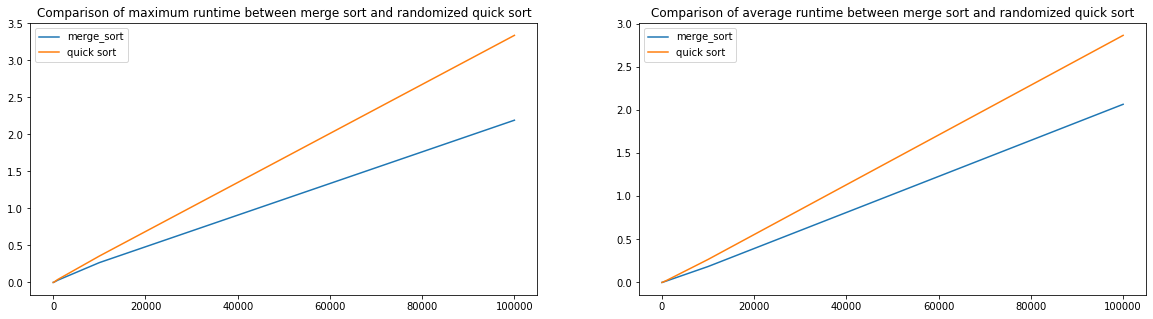

In [ ]:
sizes = list(size_runtime_dict.keys())
y_m_s_max = []
y_q_s_max = []
y_m_s_avg = []
y_q_s_avg = []

for val_dict in size_runtime_dict.values():
  y_m_s_max.append(np.array(val_dict['msort']).max())
  y_q_s_max.append(np.array(val_dict['qsort']).max())
  y_m_s_avg.append(np.array(val_dict['msort']).mean())
  y_q_s_avg.append(np.array(val_dict['qsort']).mean())



print(sizes)
print(y_m_s_max)
plt.figure(figsize=(20,5))

ax1= plt.subplot(121)
ax2= plt.subplot(122)

ax1.set_title("Comparison of maximum runtime between merge sort and randomized quick sort")
ax1.plot(sizes, y_m_s_max, label="merge_sort")
ax1.plot(sizes, y_q_s_max, label="quick sort")
ax1.legend()

ax2.set_title("Comparison of average runtime between merge sort and randomized quick sort")
ax2.plot(sizes, y_m_s_avg, label="merge_sort")
ax2.plot(sizes, y_q_s_avg, label="quick sort")
ax2.legend()